# How to Develop a CNN for MNIST Handwritten Digit Classification
## MNIST dataset 

The MNIST database (National Institute of Standards and Technology) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. 

It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

## Connect to the google drive 

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import the neccessary liberaries and loads the MNIST dataset using the Keras API 

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist


In [56]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.models import Model

## split the data into train and test set

In [57]:
np.random.seed(0)
(X_train, y_train), (X_test, y_test)= mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### assertion for:
* "The number of images is not equal to the number of labels."
* "The number of images is not equal to the number of labels."
* "The dimensions of the images are not 28x28"
* "The dimensions of the images are not 28x28"

In [58]:
# STOP: Do not change the tests below. Your implementation should pass these tests. 
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

## Creating a plot of the first nine images and Distribution of the train dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


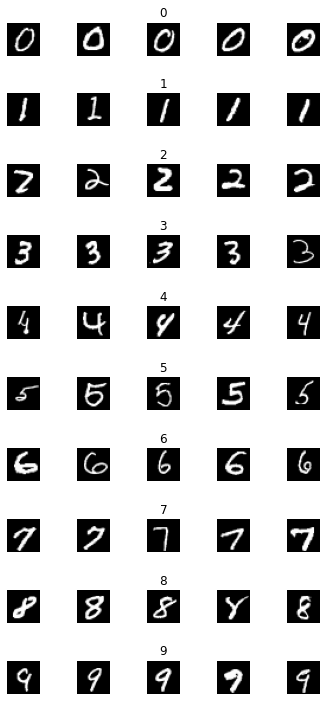

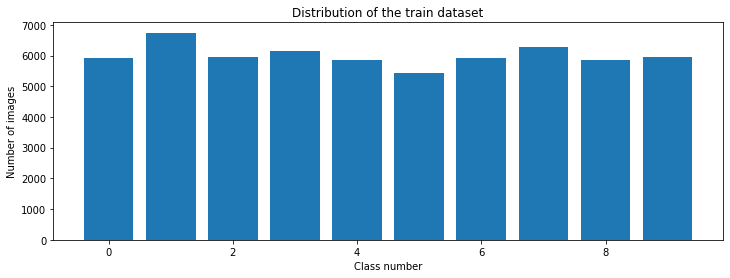

In [59]:
num_of_samples=[]
 
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

### Pre-processing 

In [60]:

# 1- Reshaping 
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# 2- Representing the targets as one-hot vectors: e.g. 2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0].
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


#3- Rescaling : Original data is uint8 (0-255). Scale it to range [0,1].
X_train = X_train/255
X_test = X_test/255

## Defining the LeNet Model

In [61]:
# define the larger model
def leNet_model():
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# Print the Summary of the model

In [62]:
model = leNet_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)              

## Trianing the model for 10 epochs

In [63]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Epoch 1/10
135/135 [==============================] - 2s 13ms/step - loss: 0.2677 - accuracy: 0.9158 - val_loss: 0.0665 - val_accuracy: 0.9798
Epoch 2/10
135/135 [==============================] - 2s 11ms/step - loss: 0.0838 - accuracy: 0.9735 - val_loss: 0.0517 - val_accuracy: 0.9858
Epoch 3/10
135/135 [==============================] - 2s 11ms/step - loss: 0.0652 - accuracy: 0.9795 - val_loss: 0.0427 - val_accuracy: 0.9872
Epoch 4/10
135/135 [==============================] - 2s 11ms/step - loss: 0.0550 - accuracy: 0.9836 - val_loss: 0.0455 - val_accuracy: 0.9873
Epoch 5/10
135/135 [==============================] - 2s 12ms/step - loss: 0.0498 - accuracy: 0.9846 - val_loss: 0.0451 - val_accuracy: 0.9883
Epoch 6/10
135/135 [==============================] - 2s 12ms/step - loss: 0.0500 - accuracy: 0.9848 - val_loss: 0.0405 - val_accuracy: 0.9888
Epoch 7/10
135/135 [==============================] - 2s 11ms/step - loss: 0.0479 - accuracy: 0.9849 - val_loss: 0.0395 - val_accuracy: 0.9895

# plotting the loss and accuracy score of the model for trainign and validation dataset 

Text(0.5, 0, 'epoch')

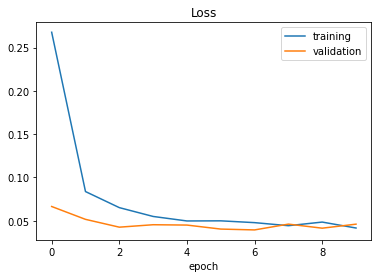

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

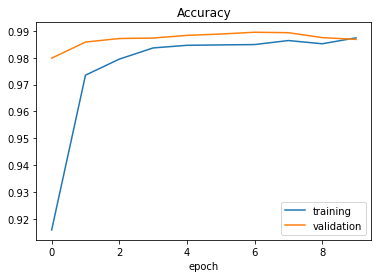

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

## evaluate the model ( test loss score and test accuracy score)

In [66]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.04704952612519264
Test accuracy: 0.9871000051498413


## Predict a number downloaded from internet by LeNet Model 

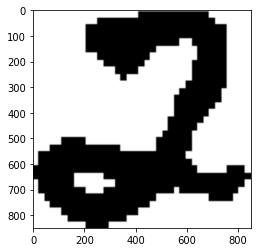

In [67]:
#predict internet number
import requests
from PIL import Image
url = '/content/drive/MyDrive/Python-Examples-Prof. salwani/9. Deep_Learning/Handwritten-digit-2.png'

img = Image.open(url)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(1, 28, 28, 1)
(1, 28, 28, 1)


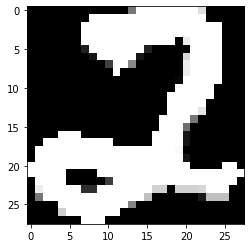

In [68]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)

print(img.shape)


In [69]:
print("predicted digit: "+str(model.predict_classes(img)))

predicted digit: [2]


# Nice job, 
## It can be observed that our model( with more than 0.98 accuracy score) could predict the number as [2] easily.
you may wanna practice these CNN models more and train this model by using fashion_mnist database or use a complicated model with deeper layers to explore these models and enjoy more.
